# Prediction using Unsupervised ML

predicting the optimum number of clusters in the given Iris dataset.

Importing necessary libraries.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading data from the dataset.

In [26]:
data = pd.read_csv("/content/Iris.csv")

In [54]:
data[0:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Read only the necessary data 

In [30]:
x = data.iloc[:, [1, 2, 3, 4]].values

The Elbow method to see the optimum numbers of clusters

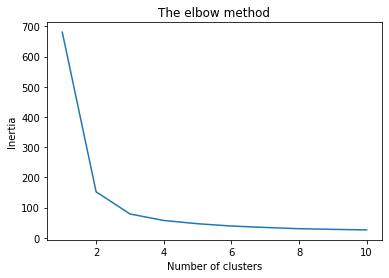

In [32]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Applying Kmeans to the data

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)

Plotting Kmeans clusters

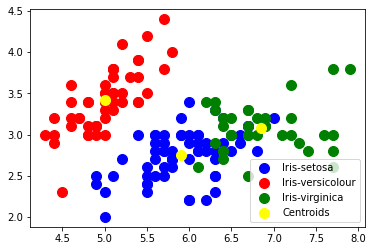

In [53]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Plotting original data - first two columns

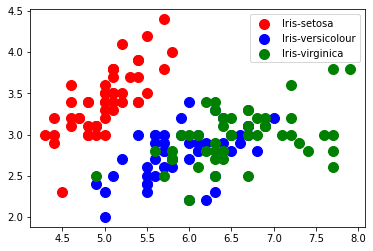

In [55]:
plt.scatter(np.array(data.loc[data["Species"] == "Iris-setosa"].iloc[:,[1]]), np.array(data.loc[data["Species"] == "Iris-setosa"].iloc[:,[2]]), 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(np.array(data.loc[data["Species"] == "Iris-versicolor"].iloc[:,[1]]), np.array(data.loc[data["Species"] == "Iris-versicolor"].iloc[:,[2]]),
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(np.array(data.loc[data["Species"] == "Iris-virginica"].iloc[:,[1]]), np.array(data.loc[data["Species"] == "Iris-virginica"].iloc[:,[2]]),
            s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()